فراخوانی کتابخانه‌های مورد نیاز برای پیاده سازی الگوریتم

In [1]:
import numpy as np
import sklearn.metrics as met
import matplotlib.pyplot as plt
import sklearn.model_selection as ms

ایجاد مجموعه داده مصنوعی برای پیاده سازی الگوریتم



باید یک مجموعه داده ایجاد شود تا بتوان KNN را روی آن‌ها پیاده سازی کرد. بنابراین، برای تولید داده‌های مصنوعی تابع CreateDataset به صورت زیر تعریف می‌شود:

In [2]:
def CreateDataset(Cs, nD, S):
    nC = len(Cs)
    N = nD * nC
    X = np.zeros((N, 2))
    Y = np.zeros((N, 1))
    for i in range(0, nD):
        for j in range(0, nC):
            X[nC*i + j, 0] = Cs[j, 0] + np.random.randn() / S
            X[nC*i + j, 1] = Cs[j, 1] + np.random.randn() / S
            Y[nC*i + j, 0] = j
    return X, Y

در کدهای فوق، تابع CreateDataset، یک مجموعه داده حول مختصات مرکزهای دسته ایجاد می‌کند. مرکزهای دسته‌ به عنوان ورودی به تابع ارجاع داده می‌شوند.

تعریف مراکز دسته برای داده‌های مصنوعی

یکی از ورودی‌های تابع CreateDataset، آرایه‌ای حاوی مراکز دسته است. بنابراین، پس از تعریف تابع CreateDataset باید تعدادی مرکز دسته برای تولید داده‌های مصنوعی تعریف شود:

In [3]:
Cs = np.array([[-0.5, 1], [1.5, 0], [-1, -1.5], [-2, 2.5], [0.5, 2]])

تعیین تعداد داده‌های مصنوعی و میزان پراکندگی آن‌ها

اکنون باید یک متغیر به نام nD برای تعداد داده در هر دسته و متغیر دیگری به نام S، برای تعیین میزان پراکندگی داده‌ها حول مراکز تعریف و آن‌ها را مقداردهی کرد:

باید توجه داشت که با افزایش S، شدت پراکندگی داده‌ها کاهش خواهد یافت.

In [4]:
nD = 140
S = 2.9

فراخوانی تابع 
CreateDateset 
و تولید داده‌های مصنوعی


In [5]:
X, Y = CreateDataset(Cs, nD, S)

در نهایت، برای رسم نمودار توزیع داده‌های تولید شده از کدهای زیر استفاده شده است



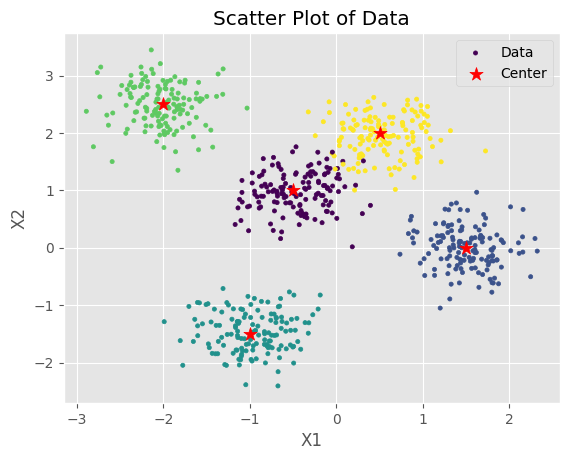

In [6]:
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1],c = Y[:, 0], s = 9, label = 'Data')
plt.scatter(Cs[:,0], Cs[:, 1], c = 'r', s = 100, label = 'Center', marker = '*')
plt.title('Scatter Plot of Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [7]:
def Distance(xi, xj):
    dij = xi - xj
    d = np.linalg.norm(dij)
    return d

In [8]:
def CalculateAllDistances(X, xi):
    N = np.shape(X)[0] # Data Size
    D = np.zeros(N) # Placeholder For Distances
    for i in range(0, N):
        xj = X[i]
        D[i] = Distance(xi, xj)
    return D

اکنون در ادامه پیاده‌سازی الگوریتم KNN با پایتون باید K همسایه نزدیک را از بین کل فاصله‌های محاسبه شده پیدا کرد. بنابراین، یک تابع دیگر برای پیاده‌سازی این عملیات تعریف شده است:

In [9]:
def KNN(K, X, xi):
    D = CalculateAllDistances(X, xi) # Calculating Distances
    A = np.argsort(D) # Sorted Args by Distance
    Ns = A[:K] # K-Nearest Neighbors
    return Ns

حالا نیاز به تابعی وجود دارد که برچسب‌ داده‌های همسایه (که تا اینجا پیدا شده‌اند) را محاسبه و سپس، با استفاده از تابعی دیگر، بهترین دسته را انتخاب کند.

In [10]:
def Classify(K, X, Y, xi):
    Ns = KNN(K, X, xi) # Getting Neighbors Args
    NsLabels = Y[Ns,0] # Getting Neighbors Labels
    C = GetClass(NsLabels)
    return C

اکنون باید تابع GetClass را تعریف کرد. این تابع برای تعیین دسته (کلاس) داده جدید بر اساس برچسب نزدیک‌ترین همسایه‌ها در تابع Classify (در کدهای فوق) استفاده شده است. به بیان دیگر، در تابع GetClass، باید با دریافت آرایه‌ی مربوط به برچسب همسایه‌ها در مورد داده جدید تصمیم‌گیری شود.

In [11]:
def GetClass(NsLabels):
    L = NsLabels.copy()
    W = {}
    for i in L:
        if i not in W.keys():
            W[i] = 1
        else:
            W[i] += 1
    MaxN = max(W.values()) # Max Count of Most Frequent Label
    BestClasses = []
    for k, v in W.items():
        if v == MaxN:
            BestClasses.append(k)
    while len(BestClasses) > 1: # While There is More Than One Best-Class
        L = L[:-1] # Remove One Element From End
        W = {}
        for i in L:
            if i not in W.keys():
                W[i] = 1
            else:
                W[i] += 1
        MaxN = max(W.values())
        BestClasses = []
        for k, v in W.items():
            if v == MaxN:
                BestClasses.append(k)
    Best = BestClasses[0]
    return Best

تقسیم داده‌ها به دو مجموعه داده‌های آموزشی و آزمایشی


In [12]:
trX, teX, trY, teY = ms.train_test_split(X, Y, test_size = 0.2, random_state = 0)

پیش‌بینی دسته داده‌ها برای مجموعه‌های Test و Train با استفاده از پیاده سازی انجام شده

In [13]:
trPrediction = np.zeros(np.size(trY))
tePrediction = np.zeros(np.size(teY))

برای هر یک از داده‌ها پیش‌بینی را انجام داد و آن‌ها را در آرایه‌های فوق ذخیره کرد

In [14]:
K = 5

# Making Predictions On Train Dataset
for i in range(0, np.size(trY)):
    xi = trX[i]
    pred = Classify(K, trX, trY, xi)
    trPrediction[i] = pred

# Making Predictions On Test Dataset
for i in range(0, np.size(teY)):
    xi = teX[i]
    pred = Classify(K, trX, trY, xi)
    tePrediction[i] = pred

به این ترتیب، پیش‌بینی‌هایی برای هر دو مجموعه داده آموزشی (Train) و آزمایشی (Test) انجام شد. باید توجه داشت که در تابع Classify تنها می‌توان از داده‌های آموزشی برای X
 و 
 Y
 استفاده کرد.

بررسی میزان صحت   برای هر دو مجموعه داده آموزش و تست

In [15]:
trAccuracy = met.accuracy_score(trY, trPrediction) # Accuracy On Train Dataset
teAccuracy = met.accuracy_score(teY, tePrediction) # Accuracy On Test Dataset
print("Train ACC = " ,trAccuracy)
print("Test ACC = " ,teAccuracy)

Train ACC =  0.9892857142857143
Test ACC =  1.0
